# **Data Loading and Preprocessing**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('Fraud_Analysis_Dataset.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1
2,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1
3,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1
4,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1


Structure of Dataset

In [ ]:
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11142 entries, 0 to 11141
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            11142 non-null  int64  
 1   type            11142 non-null  object 
 2   amount          11142 non-null  float64
 3   nameOrig        11142 non-null  object 
 4   oldbalanceOrg   11142 non-null  float64
 5   newbalanceOrig  11142 non-null  float64
 6   nameDest        11142 non-null  object 
 7   oldbalanceDest  11142 non-null  float64
 8   newbalanceDest  11142 non-null  float64
 9   isFraud         11142 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 870.6+ KB


Checking Missing Values

In [ ]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64


Checking for Duplicates

In [ ]:
print("\nNumber of Duplicates:")
print(df.duplicated().sum())


Number of Duplicates:
0


Basic Statistics

In [ ]:
print("\nBasic Statistics:")
print(df.describe())


Basic Statistics:
               step        amount  oldbalanceOrg  newbalanceOrig  \
count  11142.000000  1.114200e+04   1.114200e+04    1.114200e+04   
mean       8.717645  2.131915e+05   9.241173e+05    8.249576e+05   
std       16.067479  7.600650e+05   2.143004e+06    2.089894e+06   
min        1.000000  2.390000e+00   0.000000e+00    0.000000e+00   
25%        2.000000  4.946618e+03   4.270000e+02    0.000000e+00   
50%        6.000000  1.676126e+04   2.816950e+04    4.420605e+03   
75%        7.000000  1.543366e+05   3.040855e+05    1.114126e+05   
max       95.000000  1.000000e+07   1.990000e+07    1.300000e+07   

       oldbalanceDest  newbalanceDest       isFraud  
count    1.114200e+04    1.114200e+04  11142.000000  
mean     8.883541e+05    1.103211e+06      0.102495  
std      2.601376e+06    2.982447e+06      0.303312  
min      0.000000e+00    0.000000e+00      0.000000  
25%      0.000000e+00    0.000000e+00      0.000000  
50%      0.000000e+00    0.000000e+00      0

Class Distribution

In [ ]:
print("\nClass Distribution (isFraud):")
print(df['isFraud'].value_counts())
print("\nPercentage of Fraud Cases:")
print(df['isFraud'].value_counts(normalize=True) * 100)


Class Distribution (isFraud):
isFraud
0    10000
1     1142
Name: count, dtype: int64

Percentage of Fraud Cases:
isFraud
0    89.750494
1    10.249506
Name: proportion, dtype: float64


# **Exploratory Data Analysis (EDA)**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

Colour Pallete

In [ ]:
custom_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22']
sns.set_palette(custom_palette)
plotly_colors = custom_palette

Transaction Types vs Fraud (Count Plot)

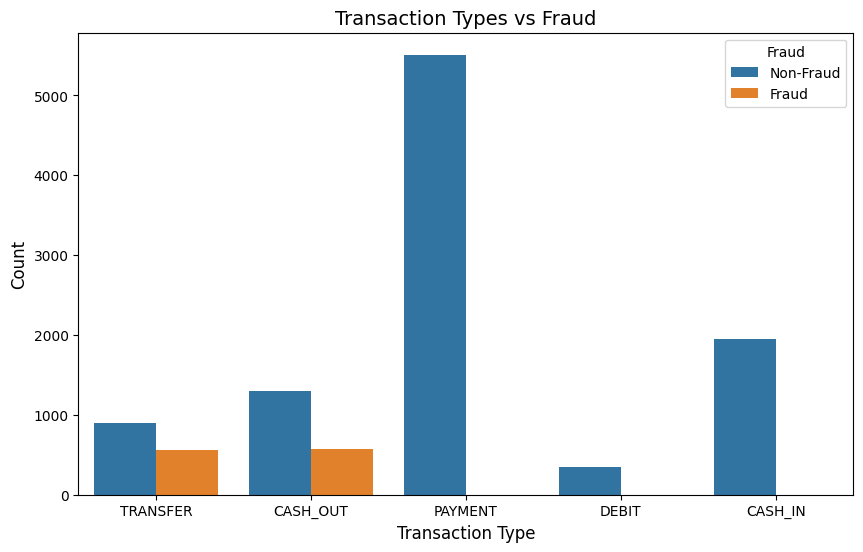

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='type', hue='isFraud')
plt.title('Transaction Types vs Fraud', fontsize=14)
plt.xlabel('Transaction Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Fraud', labels=['Non-Fraud', 'Fraud'])
plt.show()

Distribution of Transaction Amounts by Fraud (Box Plot)

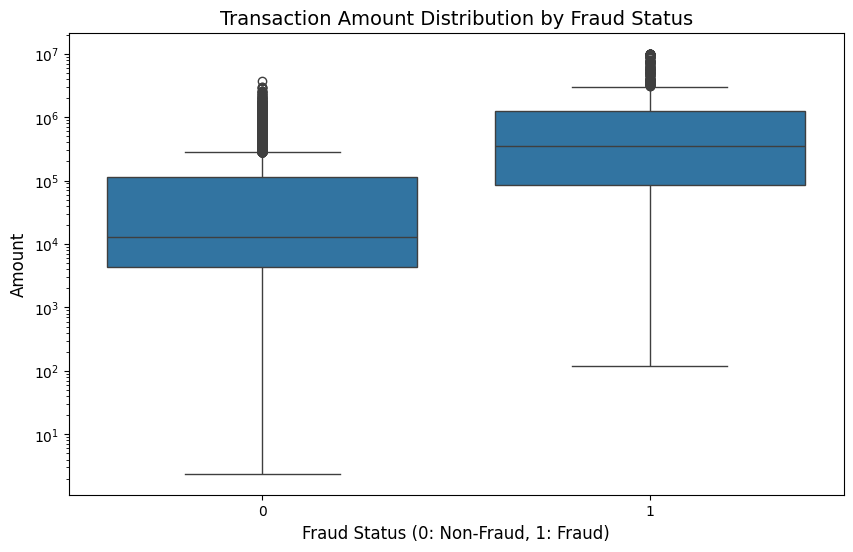

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='isFraud', y='amount')
plt.title('Transaction Amount Distribution by Fraud Status', fontsize=14)
plt.xlabel('Fraud Status (0: Non-Fraud, 1: Fraud)', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.yscale('log')
plt.show()

Balance Changes in Origin Account (Violin Plot)

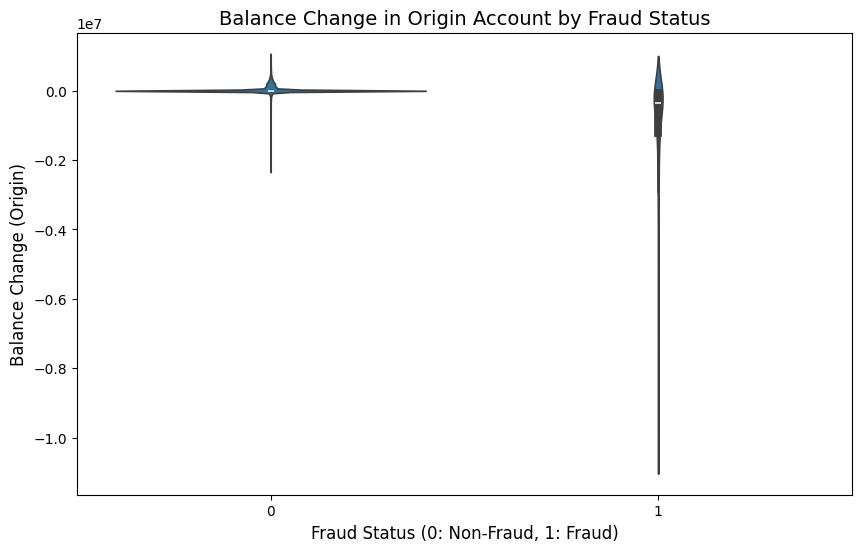

In [ ]:
df['balance_change_orig'] = df['newbalanceOrig'] - df['oldbalanceOrg']

plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='isFraud', y='balance_change_orig')
plt.title('Balance Change in Origin Account by Fraud Status', fontsize=14)
plt.xlabel('Fraud Status (0: Non-Fraud, 1: Fraud)', fontsize=12)
plt.ylabel('Balance Change (Origin)', fontsize=12)
plt.show()

Interactive Scatter Plot of Amount vs Balance Change (Plotly)

In [ ]:
fig = px.scatter(df, x='amount', y='balance_change_orig', color='isFraud',
                 title='Amount vs Balance Change (Origin) by Fraud Status',
                 labels={'amount': 'Transaction Amount', 'balance_change_orig': 'Balance Change (Origin)', 'isFraud': 'Fraud'},
                 color_discrete_map={0: plotly_colors[0], 1: plotly_colors[1]},
                 log_x=True)
fig.update_layout(title_font_size=14, xaxis_title_font_size=12, yaxis_title_font_size=12)
fig.show()

Step (Time) vs Fraud (Line Plot)

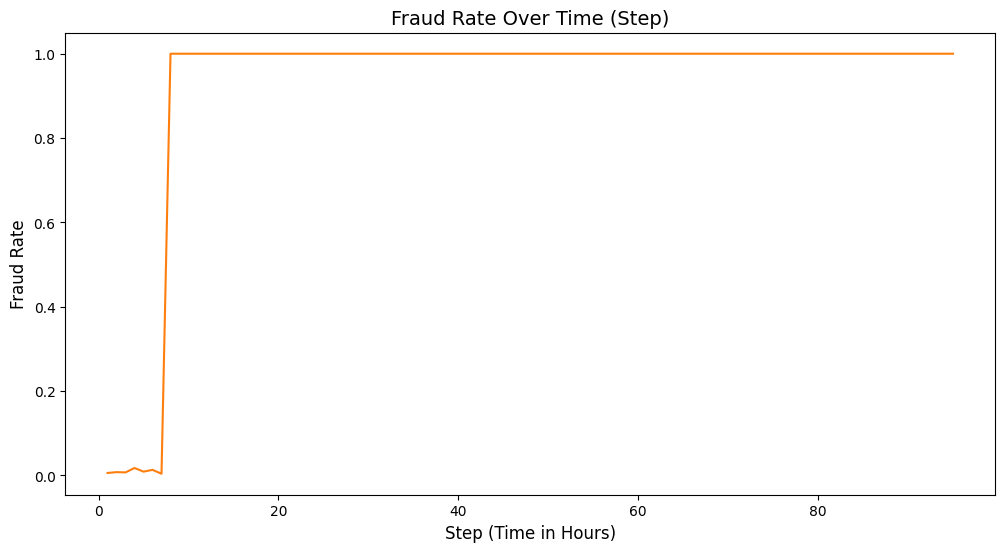

In [ ]:
fraud_by_step = df.groupby('step')['isFraud'].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(fraud_by_step['step'], fraud_by_step['isFraud'], color=plotly_colors[1])
plt.title('Fraud Rate Over Time (Step)', fontsize=14)
plt.xlabel('Step (Time in Hours)', fontsize=12)
plt.ylabel('Fraud Rate', fontsize=12)
plt.show()

Correlation Heatmap of Numerical Features

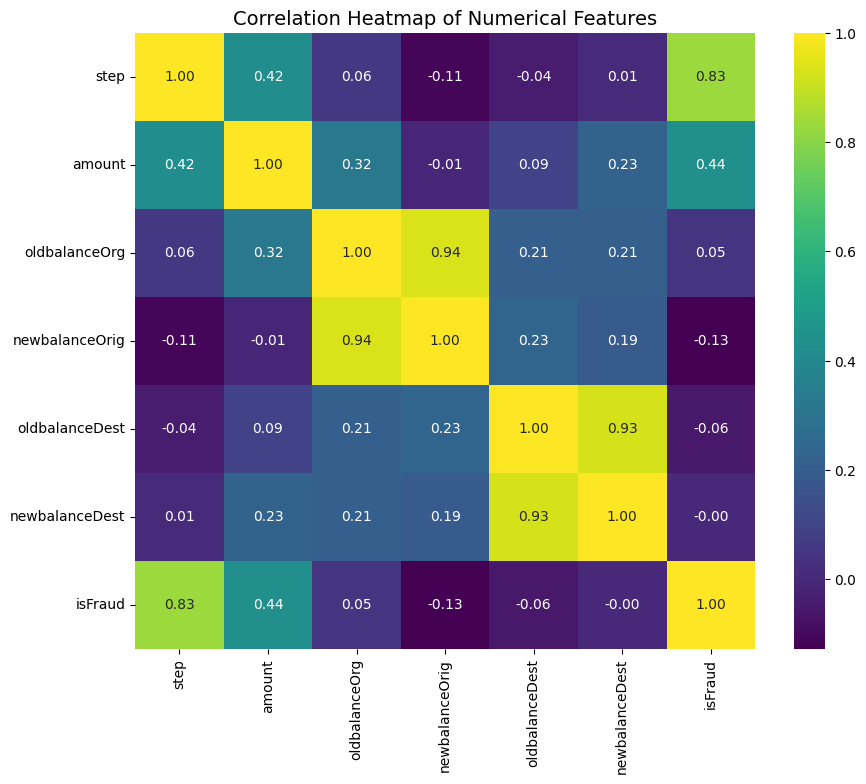

In [ ]:
plt.figure(figsize=(10, 8))
corr = df[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']].corr()
sns.heatmap(corr, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features', fontsize=14)
plt.show()

Distribution of Transaction Types (Pie Chart with Plotly)

In [ ]:
type_counts = df['type'].value_counts().reset_index()
type_counts.columns = ['type', 'count']
fig = px.pie(type_counts, values='count', names='type',
             title='Distribution of Transaction Types',
             color_discrete_sequence=plotly_colors)
fig.update_layout(title_font_size=14)
fig.show()

Donut Chart for Fraud vs Non-Fraud Distribution

In [ ]:
fraud_counts = df['isFraud'].value_counts().reset_index()
fraud_counts.columns = ['isFraud', 'count']

fig = go.Figure(data=[
    go.Pie(labels=['Non-Fraud', 'Fraud'], values=fraud_counts['count'],
           hole=0.4,
           marker_colors=[plotly_colors[0], plotly_colors[1]])
])
fig.update_layout(title='Fraud vs Non-Fraud Distribution (Donut Chart)', title_font_size=14)
fig.show()

Stacked Bar Chart for Transaction Types Over Time (Binned Steps)

In [ ]:
df['step_bin'] = pd.cut(df['step'], bins=range(0, 101, 10), labels=[f'{i}-{i+10}' for i in range(0, 100, 10)])

stacked_data = df.groupby(['step_bin', 'type', 'isFraud']).size().unstack(fill_value=0).reset_index()

fig = go.Figure()

# Stack for Non-Fraud (isFraud = 0)
fig.add_trace(go.Bar(
    x=stacked_data['step_bin'],
    y=stacked_data[0],
    name='Non-Fraud',
    marker_color=plotly_colors[0]
))

# Stack for Fraud (isFraud = 1)
fig.add_trace(go.Bar(
    x=stacked_data['step_bin'],
    y=stacked_data[1],
    name='Fraud',
    marker_color=plotly_colors[1]
))

fig.update_layout(
    barmode='stack',
    title='Transaction Types Over Time (Stacked by Fraud Status)',
    xaxis_title='Time Interval (Step Bins)',
    yaxis_title='Count',
    title_font_size=14,
    xaxis_title_font_size=12,
    yaxis_title_font_size=12
)
fig.show()

<ipython-input-22-58ba3a67e650>:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Line Graph for Cumulative Transaction Amounts by Fraud Status

In [ ]:
cumulative_amounts = df.groupby(['step', 'isFraud'])['amount'].sum().groupby('isFraud').cumsum().reset_index()

fig = go.Figure()

# Line for Non-Fraud
fig.add_trace(go.Scatter(
    x=cumulative_amounts[cumulative_amounts['isFraud'] == 0]['step'],
    y=cumulative_amounts[cumulative_amounts['isFraud'] == 0]['amount'],
    mode='lines',
    name='Non-Fraud',
    line=dict(color=plotly_colors[0])
))

# Line for Fraud
fig.add_trace(go.Scatter(
    x=cumulative_amounts[cumulative_amounts['isFraud'] == 1]['step'],
    y=cumulative_amounts[cumulative_amounts['isFraud'] == 1]['amount'],
    mode='lines',
    name='Fraud',
    line=dict(color=plotly_colors[1])
))

fig.update_layout(
    title='Cumulative Transaction Amounts Over Time by Fraud Status',
    xaxis_title='Step (Time in Hours)',
    yaxis_title='Cumulative Amount',
    title_font_size=14,
    xaxis_title_font_size=12,
    yaxis_title_font_size=12,
    yaxis_type='log'
)
fig.show()

Stacked Area Chart for Transaction Types by Fraud Status

In [ ]:
area_data = df.groupby(['step', 'type', 'isFraud']).size().unstack(fill_value=0).reset_index()

fig = go.Figure()

# Non-Fraud transactions for each type
for i, t in enumerate(df['type'].unique()):
    fig.add_trace(go.Scatter(
        x=area_data['step'],
        y=area_data[area_data['type'] == t][0],
        mode='lines',
        stackgroup='non_fraud',
        name=f'{t} (Non-Fraud)',
        line=dict(width=0.5),
        fillcolor=plotly_colors[i % len(plotly_colors)]
    ))

# Fraud transactions for each type
for i, t in enumerate(df['type'].unique()):
    fig.add_trace(go.Scatter(
        x=area_data['step'],
        y=area_data[area_data['type'] == t][1],
        mode='lines',
        stackgroup='fraud',
        name=f'{t} (Fraud)',
        line=dict(width=0.5, dash='dot'),
        fillcolor=plotly_colors[i % len(plotly_colors)]
    ))

fig.update_layout(
    title='Transaction Types Over Time (Stacked Area Chart)',
    xaxis_title='Step (Time in Hours)',
    yaxis_title='Count',
    title_font_size=14,
    xaxis_title_font_size=12,
    yaxis_title_font_size=12
)
fig.show()

Histogram of Balance Changes by Transaction Type

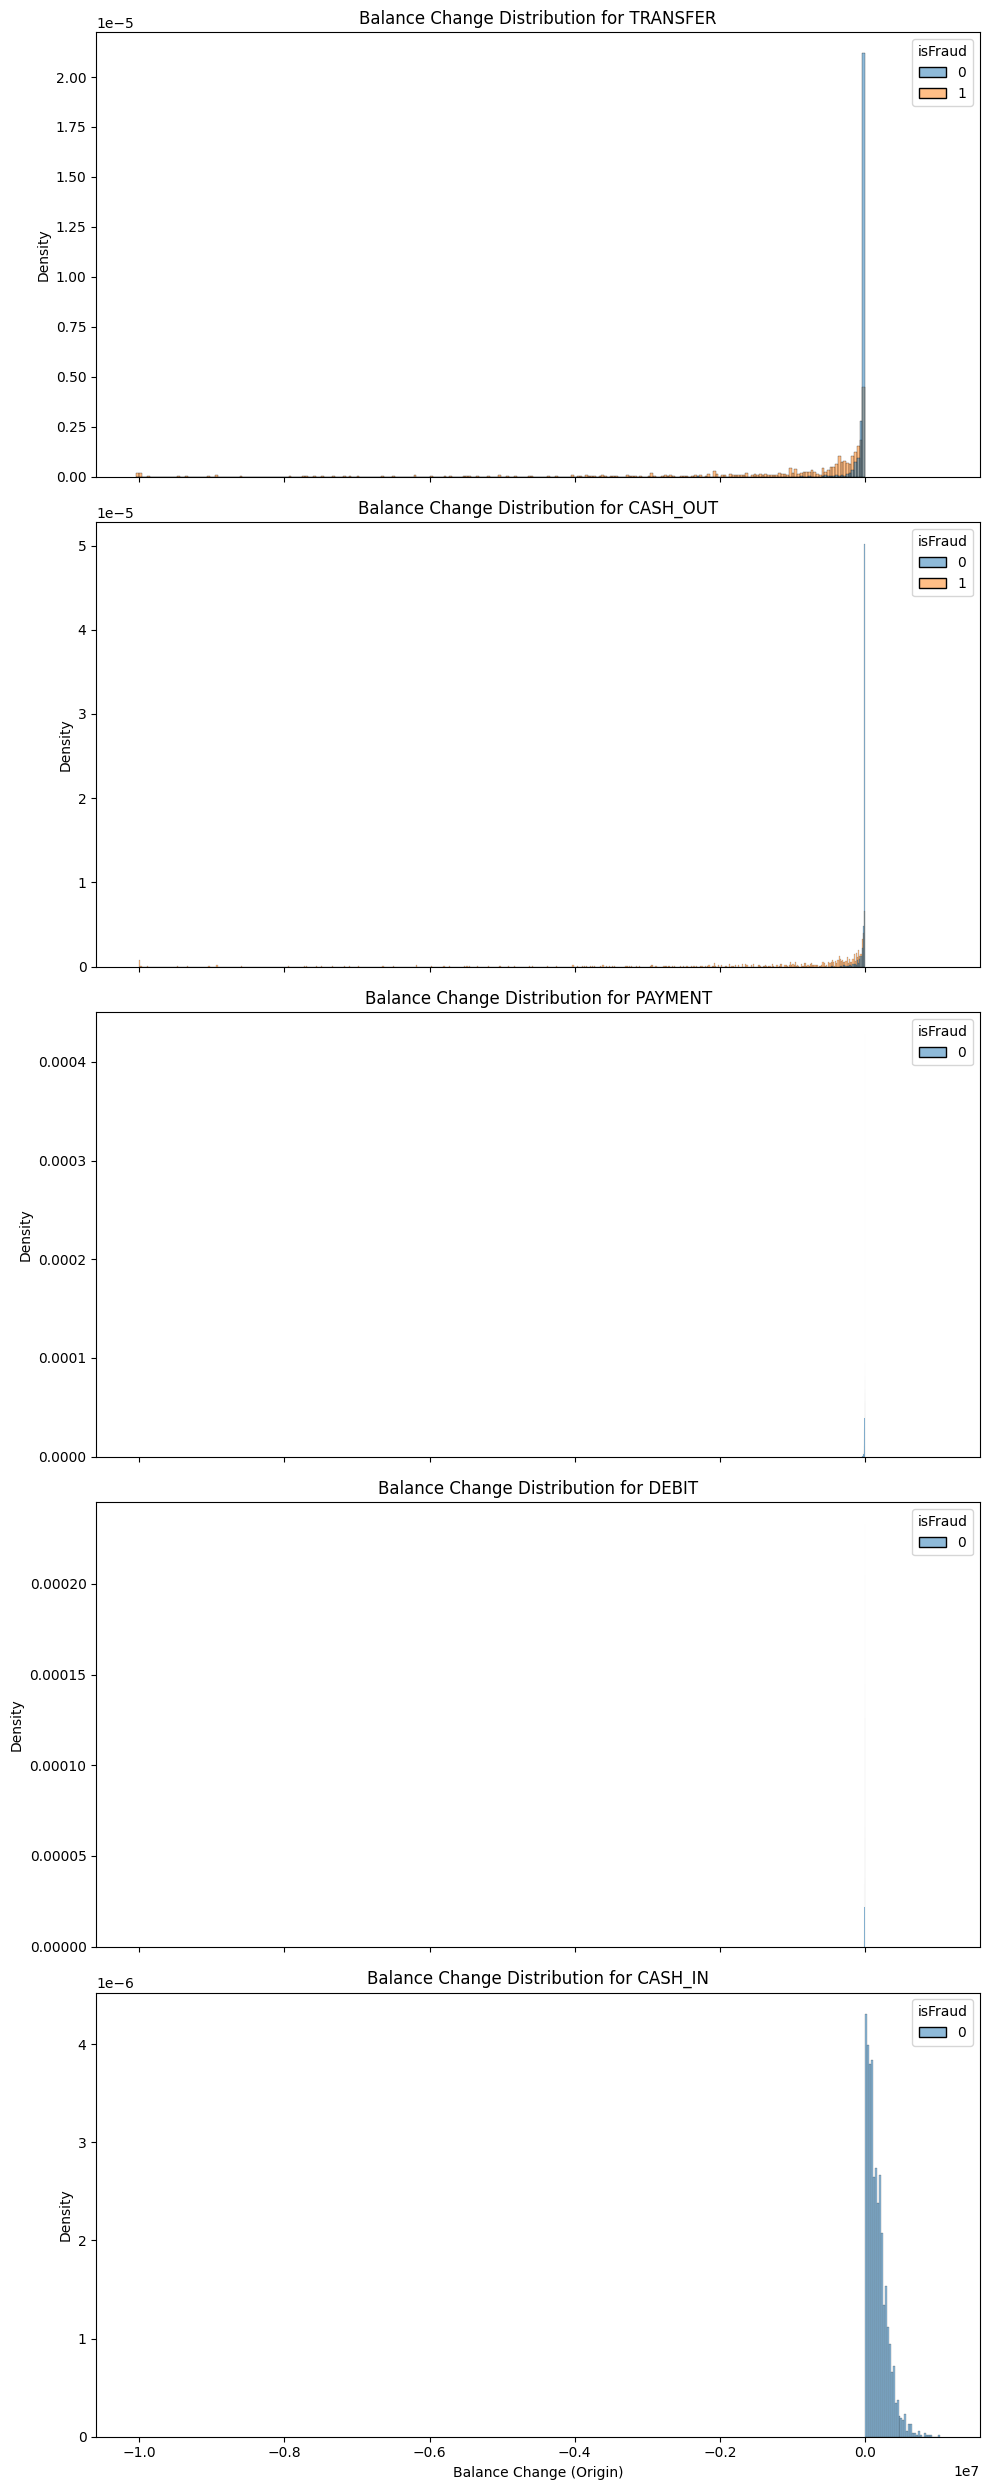

In [ ]:
types = df['type'].unique()
fig, axes = plt.subplots(len(types), 1, figsize=(10, 5 * len(types)), sharex=True)

for i, t in enumerate(types):
    sns.histplot(data=df[df['type'] == t], x='balance_change_orig', hue='isFraud',
                 ax=axes[i], stat='density', common_norm=False)
    axes[i].set_title(f'Balance Change Distribution for {t}', fontsize=12)
    axes[i].set_xlabel('Balance Change (Origin)', fontsize=10)
    axes[i].set_ylabel('Density', fontsize=10)

plt.tight_layout()
plt.show()

Interactive Parallel Coordinates Plot (Plotly)

In [ ]:
parallel_data = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']].copy()
parallel_data['amount'] = np.log1p(parallel_data['amount'])
parallel_data['oldbalanceOrg'] = np.log1p(parallel_data['oldbalanceOrg'])
parallel_data['newbalanceOrig'] = np.log1p(parallel_data['newbalanceOrig'])
parallel_data['oldbalanceDest'] = np.log1p(parallel_data['oldbalanceDest'])
parallel_data['newbalanceDest'] = np.log1p(parallel_data['newbalanceDest'])

fig = px.parallel_coordinates(parallel_data, color='isFraud',
                              labels={'amount': 'Log Amount', 'oldbalanceOrg': 'Log Old Balance (Orig)',
                                      'newbalanceOrig': 'Log New Balance (Orig)', 'oldbalanceDest': 'Log Old Balance (Dest)',
                                      'newbalanceDest': 'Log New Balance (Dest)', 'isFraud': 'Fraud'},
                              color_continuous_scale=[plotly_colors[0], plotly_colors[1]])
fig.update_layout(title='Parallel Coordinates Plot of Numerical Features', title_font_size=14)
fig.show()

# **Feature Engineering**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv('Fraud_Analysis_Dataset.csv')

Encode the type Column

In [ ]:
# One-hot encode the 'type' column
df = pd.get_dummies(df, columns=['type'], prefix='type', drop_first=True)

Balance Discrepancy Features

In [ ]:
# Balance change in origin and destination accounts
df['balance_change_orig'] = df['newbalanceOrig'] - df['oldbalanceOrg']
df['balance_change_dest'] = df['newbalanceDest'] - df['oldbalanceDest']

# Balance discrepancy (error) features
# For origin: amount should equal the balance change (if no other transactions interfere)
df['error_balance_orig'] = df['balance_change_orig'] + df['amount']
# For destination: amount should equal the balance change (if no other transactions interfere)
df['error_balance_dest'] = df['balance_change_dest'] - df['amount']

Flag for Drained Origin Account

In [ ]:
df['is_drained_orig'] = (df['newbalanceOrig'] == 0).astype(int)

Time-Based Features from step

In [ ]:
# Bin step into intervals (e.g., every 10 steps)
df['step_bin'] = pd.cut(df['step'], bins=range(0, 101, 10), labels=[i for i in range(10)])

# Cyclical encoding of step (to capture periodic patterns, e.g., daily cycles assuming 24 steps = 1 day)
df['step_hour'] = df['step'] % 24
df['step_sin'] = np.sin(2 * np.pi * df['step_hour'] / 24)
df['step_cos'] = np.cos(2 * np.pi * df['step_hour'] / 24)

Transaction Amount Features

In [ ]:
# Log-transform the amount to reduce skewness
df['log_amount'] = np.log1p(df['amount'])

# Flag for high-amount transactions (above 75th percentile)
amount_75th = df['amount'].quantile(0.75)
df['is_high_amount'] = (df['amount'] > amount_75th).astype(int)

Drop Irrelevant Columns

In [ ]:
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

Verify the New Features

In [ ]:
df.head()

print("Updated Columns:", df.columns.tolist())

Updated Columns: ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER', 'balance_change_orig', 'balance_change_dest', 'error_balance_orig', 'error_balance_dest', 'is_drained_orig', 'step_bin', 'step_hour', 'step_sin', 'step_cos', 'log_amount', 'is_high_amount']


## **Machine Learning**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
%matplotlib inline

custom_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22']
sns.set_palette(custom_palette)
plotly_colors = custom_palette

# Reloading the dataset and reapplying feature engineering
df = pd.read_csv('Fraud_Analysis_Dataset.csv')

df = pd.get_dummies(df, columns=['type'], prefix='type', drop_first=True)
df['balance_change_orig'] = df['newbalanceOrig'] - df['oldbalanceOrg']
df['balance_change_dest'] = df['newbalanceDest'] - df['oldbalanceDest']
df['error_balance_orig'] = df['balance_change_orig'] + df['amount']
df['error_balance_dest'] = df['balance_change_dest'] - df['amount']
df['is_drained_orig'] = (df['newbalanceOrig'] == 0).astype(int)
df['step_bin'] = pd.cut(df['step'], bins=range(0, 101, 10), labels=[i for i in range(10)])
df['step_hour'] = df['step'] % 24
df['step_sin'] = np.sin(2 * np.pi * df['step_hour'] / 24)
df['step_cos'] = np.cos(2 * np.pi * df['step_hour'] / 24)
df['log_amount'] = np.log1p(df['amount'])
amount_75th = df['amount'].quantile(0.75)
df['is_high_amount'] = (df['amount'] > amount_75th).astype(int)
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

In [ ]:
# Defining features (X) and target (y)
X = df.drop('isFraud', axis=1)
y = df['isFraud']

# Splitting the data into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handling class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_scaled, y_train = smote.fit_resample(X_train_scaled, y_train)

# Verifying the new class distribution after SMOTE
print("Class Distribution After SMOTE (Training Set):")
print(pd.Series(y_train).value_counts())

Class Distribution After SMOTE (Training Set):
isFraud
0    7000
1    7000
Name: count, dtype: int64


Logistic Regression

Logistic Regression Performance:
Confusion Matrix:
[[2973   27]
 [   6  337]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3000
           1       0.93      0.98      0.95       343

    accuracy                           0.99      3343
   macro avg       0.96      0.99      0.97      3343
weighted avg       0.99      0.99      0.99      3343

ROC-AUC Score: 0.996


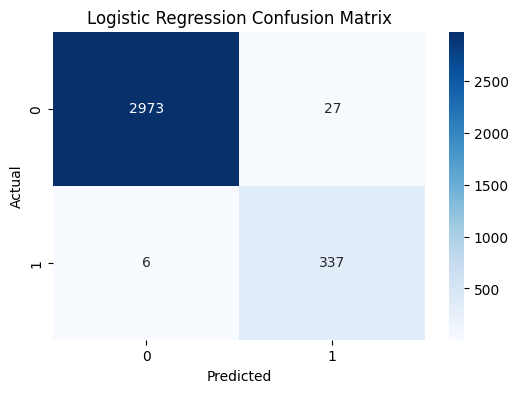

In [ ]:
# Training logistic regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Predict on test set
lr_pred = lr_model.predict(X_test_scaled)
lr_pred_prob = lr_model.predict_proba(X_test_scaled)[:, 1]

# Evaluating the model
print("Logistic Regression Performance:")
print("Confusion Matrix:")
lr_cm = confusion_matrix(y_test, lr_pred)
print(lr_cm)
print("\nClassification Report:")
print(classification_report(y_test, lr_pred))
lr_roc_auc = roc_auc_score(y_test, lr_pred_prob)
print(f"ROC-AUC Score: {lr_roc_auc:.3f}")

# Visualizing the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix', fontsize=12)
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('Actual', fontsize=10)
plt.show()

# Plotting ROC Curve
fpr, tpr, _ = roc_curve(y_test, lr_pred_prob)
fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name=f'ROC Curve (AUC = {lr_roc_auc:.3f})', line=dict(color=plotly_colors[0])))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random', line=dict(color=plotly_colors[2], dash='dash')))
fig.update_layout(
    title='Logistic Regression ROC Curve',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    title_font_size=14,
    xaxis_title_font_size=12,
    yaxis_title_font_size=12
)
fig.show()

Random Forest

Random Forest Performance:
Confusion Matrix:
[[3000    0]
 [   1  342]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3000
           1       1.00      1.00      1.00       343

    accuracy                           1.00      3343
   macro avg       1.00      1.00      1.00      3343
weighted avg       1.00      1.00      1.00      3343

ROC-AUC Score: 1.000


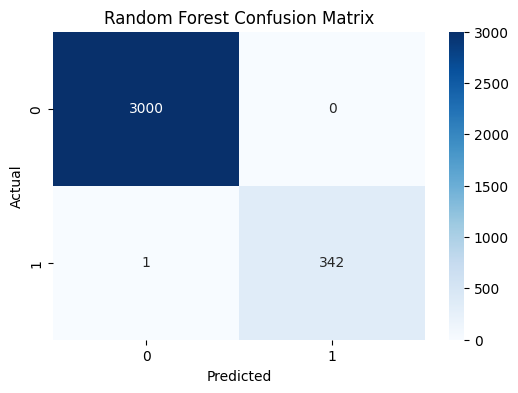

In [ ]:
# Training random forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict on test set
rf_pred = rf_model.predict(X_test_scaled)
rf_pred_prob = rf_model.predict_proba(X_test_scaled)[:, 1]

# Evaluating the model
print("Random Forest Performance:")
print("Confusion Matrix:")
rf_cm = confusion_matrix(y_test, rf_pred)
print(rf_cm)
print("\nClassification Report:")
print(classification_report(y_test, rf_pred))
rf_roc_auc = roc_auc_score(y_test, rf_pred_prob)
print(f"ROC-AUC Score: {rf_roc_auc:.3f}")

# Visualizing the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix', fontsize=12)
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('Actual', fontsize=10)
plt.show()

# Plotting ROC Curve
fpr, tpr, _ = roc_curve(y_test, rf_pred_prob)
fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name=f'ROC Curve (AUC = {rf_roc_auc:.3f})', line=dict(color=plotly_colors[0])))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random', line=dict(color=plotly_colors[2], dash='dash')))
fig.update_layout(
    title='Random Forest ROC Curve',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    title_font_size=14,
    xaxis_title_font_size=12,
    yaxis_title_font_size=12
)
fig.show()

Comparing Model Performance

In [ ]:
comparison_data = {
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [classification_report(y_test, lr_pred, output_dict=True)['accuracy'],
                classification_report(y_test, rf_pred, output_dict=True)['accuracy']],
    'Precision (Fraud)': [classification_report(y_test, lr_pred, output_dict=True)['1']['precision'],
                        classification_report(y_test, rf_pred, output_dict=True)['1']['precision']],
    'Recall (Fraud)': [classification_report(y_test, lr_pred, output_dict=True)['1']['recall'],
                      classification_report(y_test, rf_pred, output_dict=True)['1']['recall']],
    'F1-Score (Fraud)': [classification_report(y_test, lr_pred, output_dict=True)['1']['f1-score'],
                        classification_report(y_test, rf_pred, output_dict=True)['1']['f1-score']],
    'ROC-AUC': [lr_roc_auc, rf_roc_auc]
}
comparison_df = pd.DataFrame(comparison_data)
print("\nModel Comparison:")
print(comparison_df)


Model Comparison:
                 Model  Accuracy  Precision (Fraud)  Recall (Fraud)  \
0  Logistic Regression  0.990129           0.925824        0.982507   
1        Random Forest  0.999701           1.000000        0.997085   

   F1-Score (Fraud)   ROC-AUC  
0          0.953324  0.995534  
1          0.998540  0.999968  


**Random Forest is the best model**

# **Deep Learning**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.utils.class_weight import compute_class_weight
import joblib
%matplotlib inline

custom_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22']
sns.set_palette(custom_palette)
plotly_colors = custom_palette

df = pd.read_csv('Fraud_Analysis_Dataset.csv')
df = pd.get_dummies(df, columns=['type'], prefix='type', drop_first=True)
df['balance_change_orig'] = df['newbalanceOrig'] - df['oldbalanceOrg']
df['balance_change_dest'] = df['newbalanceDest'] - df['oldbalanceDest']
df['error_balance_orig'] = df['balance_change_orig'] + df['amount']
df['error_balance_dest'] = df['balance_change_dest'] - df['amount']
df['is_drained_orig'] = (df['newbalanceOrig'] == 0).astype(int)
df['step_bin'] = pd.cut(df['step'], bins=range(0, 101, 10), labels=[i for i in range(10)])
df['step_hour'] = df['step'] % 24
df['step_sin'] = np.sin(2 * np.pi * df['step_hour'] / 24)
df['step_cos'] = np.cos(2 * np.pi * df['step_hour'] / 24)
df['log_amount'] = np.log1p(df['amount'])
amount_75th = df['amount'].quantile(0.75)
df['is_high_amount'] = (df['amount'] > amount_75th).astype(int)
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

In [ ]:
X = df.drop('isFraud', axis=1)
y = df['isFraud']

# Splitting the data into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Computing class weights to handle imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))
print("Class Weights:", class_weight_dict)

Class Weights: {0: np.float64(0.5570714285714286), 1: np.float64(4.880475594493117)}


Deep Neural Network

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



195/195 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7061 - loss: 0.6238 - val_accuracy: 0.9827 - val_loss: 0.0926
Epoch 2/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9524 - loss: 0.1416 - val_accuracy: 0.9679 - val_loss: 0.0800
Epoch 3/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9624 - loss: 0.0957 - val_accuracy: 0.9865 - val_loss: 0.0512
Epoch 4/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9684 - loss: 0.0712 - val_accuracy: 0.9821 - val_loss: 0.0516
Epoch 5/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9812 - loss: 0.0481 - val_accuracy: 0.9865 - val_loss: 0.0492
Epoch 6/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9814 - loss: 0.0481 - val_accuracy: 0.9827 - val_loss: 0.0525
Epoch 7/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9796 - loss: 0.0526 - val_accuracy: 0.9885 - val_loss: 0.0424
Epoch 8/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9810 - loss: 0.0525 - val_accuracy: 0.9923 - val_

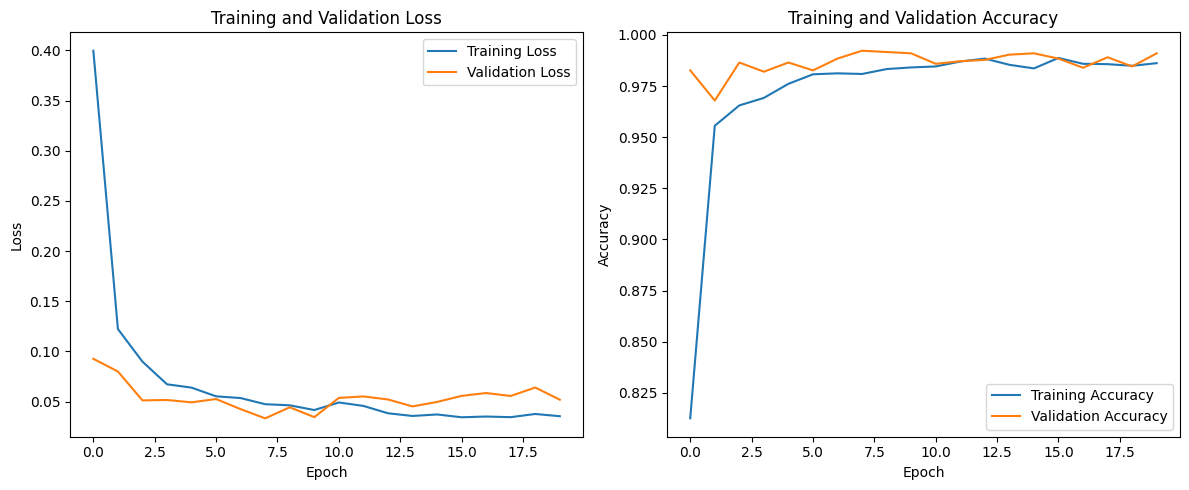

In [ ]:
# Building the DNN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32,
                    validation_split=0.2, class_weight=class_weight_dict, verbose=1)

# Plotting training history (loss and accuracy)
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color=plotly_colors[0])
plt.plot(history.history['val_loss'], label='Validation Loss', color=plotly_colors[1])
plt.title('Training and Validation Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color=plotly_colors[0])
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color=plotly_colors[1])
plt.title('Training and Validation Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.legend()

plt.tight_layout()
plt.show()

Evaluating DNN Model

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
DNN Performance:
Confusion Matrix:
[[2984   16]
 [  11  332]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3000
           1       0.95      0.97      0.96       343

    accuracy                           0.99      3343
   macro avg       0.98      0.98      0.98      3343
weighted avg       0.99      0.99      0.99      3343

ROC-AUC Score: 0.994


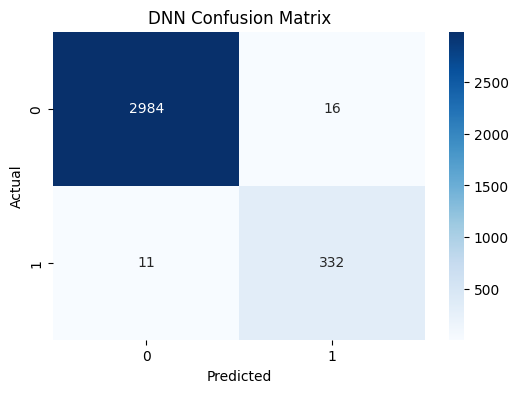

In [ ]:
# Predict on test set
dnn_pred_prob = model.predict(X_test_scaled)
dnn_pred = (dnn_pred_prob > 0.5).astype(int).flatten()

# Evaluating the model
print("DNN Performance:")
print("Confusion Matrix:")
dnn_cm = confusion_matrix(y_test, dnn_pred)
print(dnn_cm)
print("\nClassification Report:")
print(classification_report(y_test, dnn_pred))
dnn_roc_auc = roc_auc_score(y_test, dnn_pred_prob)
print(f"ROC-AUC Score: {dnn_roc_auc:.3f}")

# Visualizing the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(dnn_cm, annot=True, fmt='d', cmap='Blues')
plt.title('DNN Confusion Matrix', fontsize=12)
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('Actual', fontsize=10)
plt.show()

# Plotting ROC Curve
fpr, tpr, _ = roc_curve(y_test, dnn_pred_prob)
fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name=f'ROC Curve (AUC = {dnn_roc_auc:.3f})', line=dict(color=plotly_colors[0])))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random', line=dict(color=plotly_colors[2], dash='dash')))
fig.update_layout(
    title='DNN ROC Curve',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    title_font_size=14,
    xaxis_title_font_size=12,
    yaxis_title_font_size=12
)
fig.show()

Retrain Random Forest and Compute Metrics

In [ ]:
# Retrain Random Forest
from sklearn.ensemble import RandomForestClassifier

# Use the same training and testing sets
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict on test set
rf_pred = rf_model.predict(X_test_scaled)
rf_pred_prob = rf_model.predict_proba(X_test_scaled)[:, 1]

# Computing Random Forest metrics
rf_metrics = {
    'Model': 'Random Forest',
    'Accuracy': classification_report(y_test, rf_pred, output_dict=True)['accuracy'],
    'Precision (Fraud)': classification_report(y_test, rf_pred, output_dict=True)['1']['precision'],
    'Recall (Fraud)': classification_report(y_test, rf_pred, output_dict=True)['1']['recall'],
    'F1-Score (Fraud)': classification_report(y_test, rf_pred, output_dict=True)['1']['f1-score'],
    'ROC-AUC': roc_auc_score(y_test, rf_pred_prob)
}

Comparing DNN with Random Forest

In [ ]:
# DNN metrics (already computed in the evaluation step)
dnn_metrics = {
    'Model': 'Deep Neural Network',
    'Accuracy': classification_report(y_test, dnn_pred, output_dict=True)['accuracy'],
    'Precision (Fraud)': classification_report(y_test, dnn_pred, output_dict=True)['1']['precision'],
    'Recall (Fraud)': classification_report(y_test, dnn_pred, output_dict=True)['1']['recall'],
    'F1-Score (Fraud)': classification_report(y_test, dnn_pred, output_dict=True)['1']['f1-score'],
    'ROC-AUC': dnn_roc_auc
}

# Logistic Regression metrics (retrain to include in comparison, same setup as Step 4)
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_pred_prob = lr_model.predict_proba(X_test_scaled)[:, 1]
lr_metrics = {
    'Model': 'Logistic Regression',
    'Accuracy': classification_report(y_test, lr_pred, output_dict=True)['accuracy'],
    'Precision (Fraud)': classification_report(y_test, lr_pred, output_dict=True)['1']['precision'],
    'Recall (Fraud)': classification_report(y_test, lr_pred, output_dict=True)['1']['recall'],
    'F1-Score (Fraud)': classification_report(y_test, lr_pred, output_dict=True)['1']['f1-score'],
    'ROC-AUC': roc_auc_score(y_test, lr_pred_prob)
}

# Creating comparison table
comparison_df = pd.DataFrame([lr_metrics, rf_metrics, dnn_metrics])

print("\nModel Comparison:")
print(comparison_df)


Model Comparison:
                 Model  Accuracy  Precision (Fraud)  Recall (Fraud)  \
0  Logistic Regression  0.991624           1.000000        0.918367   
1        Random Forest  0.999402           1.000000        0.994169   
2  Deep Neural Network  0.991923           0.954023        0.967930   

   F1-Score (Fraud)   ROC-AUC  
0          0.957447  0.995077  
1          0.997076  0.999925  
2          0.960926  0.994078  


**Random Forest is the Best Model**

NLP cannot be directly applied because there’s no text data in the dataset. NLP techniques like sentiment analysis, topic modeling, or text classification require textual content, which is absent here.

Since NLP isn’t feasible, let’s focus on **Autoencoder for Anomaly Detection** as an AI approach, since it’s a practical way to leverage AI without requiring text data. Autoencoders can learn to reconstruct normal transactions and flag outliers (potential fraud) based on reconstruction error.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

custom_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22']
sns.set_palette(custom_palette)
plotly_colors = custom_palette

In [ ]:
X_train_non_fraud = X_train_scaled[y_train == 0]

# We’ll use the full test set (including fraud) to evaluate anomaly detection
X_test_scaled = X_test_scaled
y_test = y_test

Building and Training the Autoencoder

Epoch 1/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5762 - val_loss: 0.2022
Epoch 2/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1427 - val_loss: 0.0687
Epoch 3/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0490 - val_loss: 0.0351
Epoch 4/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0278 - val_loss: 0.0262
Epoch 5/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0215 - val_loss: 0.0200
Epoch 6/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0153 - val_loss: 0.0159
Epoch 7/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0115 - val_loss: 0.0125
Epoch 8/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0095 - val_loss: 0.0105
Epoch 9/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0083 - val_loss: 0.0090
Epoch 10/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0063 - val_loss: 0.0079
Epoch 11/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0058 - val_loss: 0.0068
Epoch 12/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

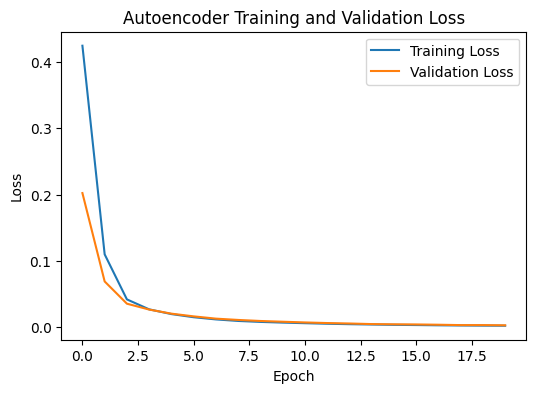

In [ ]:
# Defining the autoencoder architecture
input_dim = X_train_scaled.shape[1]  # Number of features
input_layer = Input(shape=(input_dim,))
encoder = Dense(32, activation='relu')(input_layer)
encoder = Dense(16, activation='relu')(encoder)
decoder = Dense(32, activation='relu')(encoder)
decoder = Dense(input_dim, activation='linear')(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mse')

# Training the autoencoder on non-fraud data
history = autoencoder.fit(X_train_non_fraud, X_train_non_fraud, epochs=20, batch_size=32,
                          validation_split=0.2, verbose=1)

# Plotting training history
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Training Loss', color=plotly_colors[0])
plt.plot(history.history['val_loss'], label='Validation Loss', color=plotly_colors[1])
plt.title('Autoencoder Training and Validation Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.legend()
plt.show()

Detect Anomalies Using Reconstruction Error

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Autoencoder (Anomaly Detection) Performance:
Confusion Matrix:
[[2853  147]
 [  17  326]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      3000
           1       0.69      0.95      0.80       343

    accuracy                           0.95      3343
   macro avg       0.84      0.95      0.89      3343
weighted avg       0.96      0.95      0.95      3343

ROC-AUC Score: 0.986


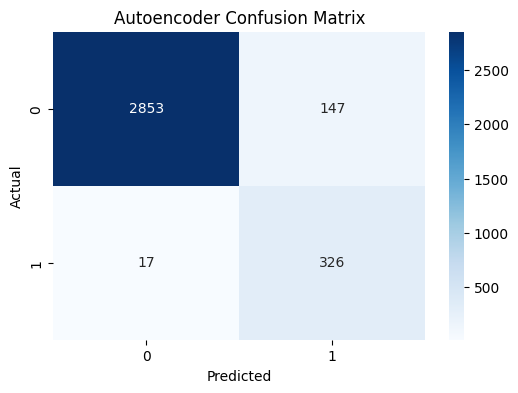

In [ ]:
# Computing reconstruction error on the test set
reconstructions = autoencoder.predict(X_test_scaled)
mse = np.mean(np.power(X_test_scaled - reconstructions, 2), axis=1)

# Determining a threshold for anomaly detection (e.g., 95th percentile of errors on non-fraud training data)
train_reconstructions = autoencoder.predict(X_train_non_fraud)
train_mse = np.mean(np.power(X_train_non_fraud - train_reconstructions, 2), axis=1)
threshold = np.percentile(train_mse, 95)

# Classify test transactions as fraud if their error exceeds the threshold
autoencoder_pred = (mse > threshold).astype(int)

# Evaluating the autoencoder’s performance
print("Autoencoder (Anomaly Detection) Performance:")
print("Confusion Matrix:")
autoencoder_cm = confusion_matrix(y_test, autoencoder_pred)
print(autoencoder_cm)
print("\nClassification Report:")
print(classification_report(y_test, autoencoder_pred))
autoencoder_roc_auc = roc_auc_score(y_test, mse)
print(f"ROC-AUC Score: {autoencoder_roc_auc:.3f}")

# Visualizing the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(autoencoder_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Autoencoder Confusion Matrix', fontsize=12)
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('Actual', fontsize=10)
plt.show()

# Plotting ROC Curve
fpr, tpr, _ = roc_curve(y_test, mse)
fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name=f'ROC Curve (AUC = {autoencoder_roc_auc:.3f})', line=dict(color=plotly_colors[0])))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random', line=dict(color=plotly_colors[2], dash='dash')))
fig.update_layout(
    title='Autoencoder ROC Curve',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    title_font_size=14,
    xaxis_title_font_size=12,
    yaxis_title_font_size=12
)
fig.show()

Comparision Table

In [ ]:
autoencoder_metrics = {
    'Model': 'Autoencoder (Anomaly Detection)',
    'Accuracy': classification_report(y_test, autoencoder_pred, output_dict=True)['accuracy'],
    'Precision (Fraud)': classification_report(y_test, autoencoder_pred, output_dict=True)['1']['precision'],
    'Recall (Fraud)': classification_report(y_test, autoencoder_pred, output_dict=True)['1']['recall'],
    'F1-Score (Fraud)': classification_report(y_test, autoencoder_pred, output_dict=True)['1']['f1-score'],
    'ROC-AUC': autoencoder_roc_auc
}

comparison_df = pd.concat([comparison_df, pd.DataFrame([autoencoder_metrics])], ignore_index=True)

print("\nUpdated Model Comparison:")
print(comparison_df)


Updated Model Comparison:
                             Model  Accuracy  Precision (Fraud)  \
0              Logistic Regression  0.991624           1.000000   
1                    Random Forest  0.999402           1.000000   
2              Deep Neural Network  0.991923           0.954023   
3  Autoencoder (Anomaly Detection)  0.950942           0.689218   

   Recall (Fraud)  F1-Score (Fraud)   ROC-AUC  
0        0.918367          0.957447  0.995077  
1        0.994169          0.997076  0.999925  
2        0.967930          0.960926  0.994078  
3        0.950437          0.799020  0.985868  


**Random Forest is the best model for Fraud Detection**

# **SHAP (SHapley Additive exPlanations)**

Model classes: [0 1]
Shape of X_test: (2229, 9)
Type of shap_values: <class 'numpy.ndarray'>
Length of shap_values: 2229
Shape of shap_values elements: [(9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2), (9, 2),

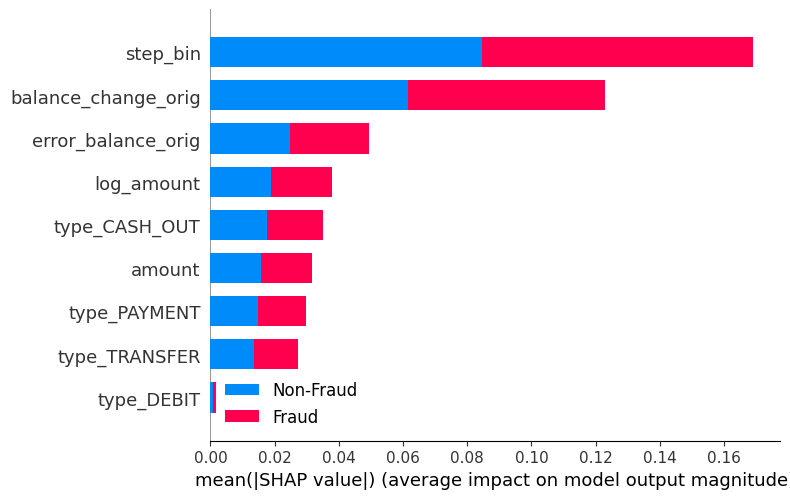

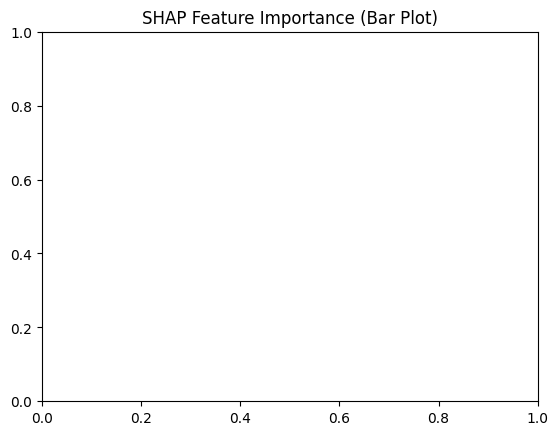

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

# Suppress all FutureWarnings to avoid clutter
warnings.filterwarnings("ignore", category=FutureWarning)

# Preprocessing: Ensure all features are numeric and handle missing values
if 'type' in df.columns:
    df = pd.get_dummies(df, columns=['type'], drop_first=True)

# Feature engineering
df['balance_change_orig'] = df['newbalanceOrig'] - df['oldbalanceOrg']
df['error_balance_orig'] = df['amount'] - df['balance_change_orig']
df['log_amount'] = np.log1p(df['amount'])
df['step_bin'] = pd.cut(df['step'], bins=5, labels=False)

# Define features and target
features = ['amount', 'balance_change_orig', 'error_balance_orig', 'log_amount', 'step_bin']
features.extend([col for col in df.columns if col.startswith('type_')])
features = [col for col in features if col in df.columns]
X = df[features]
y = df['isFraud']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Debug: Check the model's classes
print("Model classes:", rf_model.classes_)

# Compute SHAP values using TreeExplainer
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# Debug: Inspect shap_values
print("Shape of X_test:", X_test.shape)
print("Type of shap_values:", type(shap_values))
print("Length of shap_values:", len(shap_values))
print("Shape of shap_values elements:", [sv.shape for sv in shap_values])

# Reshape shap_values if necessary
if len(shap_values) == X_test.shape[0]:
    shap_values = np.array(shap_values)  # Shape: (n_samples, n_features, n_classes)
    shap_values = [shap_values[:, :, 0], shap_values[:, :, 1]]  # Split into two arrays
    print("Reshaped shap_values:", [sv.shape for sv in shap_values])

# Extract SHAP values for class 1 (fraud)
shap_values_for_fraud = shap_values[1]
print("Shape of shap_values_for_fraud:", shap_values_for_fraud.shape)


# Summary Plot (Bar Plot for multi-output)
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, plot_type="bar", class_names=['Non-Fraud', 'Fraud'], class_inds=[0, 1])
plt.title("SHAP Feature Importance (Bar Plot)")
plt.savefig('shap_bar_plot.png', dpi=300, bbox_inches='tight')
plt.show()


# **Advanced Visualization**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
import shap
import plotly.graph_objects as go
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

custom_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22']
sns.set_palette(custom_palette)
plotly_colors = custom_palette

# Reload the dataset and reapply feature engineering
df = pd.read_csv('Fraud_Analysis_Dataset.csv')
df = pd.get_dummies(df, columns=['type'], prefix='type', drop_first=True)
df['balance_change_orig'] = df['newbalanceOrig'] - df['oldbalanceOrg']
df['balance_change_dest'] = df['newbalanceDest'] - df['oldbalanceDest']
df['error_balance_orig'] = df['balance_change_orig'] + df['amount']
df['error_balance_dest'] = df['balance_change_dest'] - df['amount']
df['is_drained_orig'] = (df['newbalanceOrig'] == 0).astype(int)
df['step_bin'] = pd.cut(df['step'], bins=range(0, 101, 10), labels=[i for i in range(10)]).astype(int)
df['step_hour'] = df['step'] % 24
df['step_sin'] = np.sin(2 * np.pi * df['step_hour'] / 24)
df['step_cos'] = np.cos(2 * np.pi * df['step_hour'] / 24)
df['log_amount'] = np.log1p(df['amount'])
amount_75th = df['amount'].quantile(0.75)
df['is_high_amount'] = (df['amount'] > amount_75th).astype(int)
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

In [ ]:
X = df.drop('isFraud', axis=1)
y = df['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Get predictions and probabilities
rf_pred = rf_model.predict(X_test_scaled)
rf_pred_prob = rf_model.predict_proba(X_test_scaled)[:, 1]

Interactive Confusion Matrix

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, rf_pred)

# Create a Plotly heatmap for the confusion matrix
z = cm
x = ['Non-Fraud', 'Fraud']
y = ['Non-Fraud', 'Fraud']

# Create the heatmap
fig = ff.create_annotated_heatmap(
    z=z,
    x=x,
    y=y,
    colorscale=[[0, plotly_colors[0]], [1, plotly_colors[3]]],  # Blue to purple gradient
    showscale=True
)

# Update layout
fig.update_layout(
    title='Random Forest Confusion Matrix',
    xaxis_title='Predicted Label',
    yaxis_title='True Label',
    title_font_size=14,
    xaxis_title_font_size=12,
    yaxis_title_font_size=12
)

fig.show()

Interactive ROC Curve with AUC

In [ ]:
fpr, tpr, _ = roc_curve(y_test, rf_pred_prob)
roc_auc = auc(fpr, tpr)

# Create the ROC curve plot
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=fpr,
    y=tpr,
    mode='lines',
    name=f'ROC Curve (AUC = {roc_auc:.3f})',
    line=dict(color=plotly_colors[0])
))
fig.add_trace(go.Scatter(
    x=[0, 1],
    y=[0, 1],
    mode='lines',
    name='Random',
    line=dict(color=plotly_colors[2], dash='dash')
))

# Update layout
fig.update_layout(
    title='Random Forest ROC Curve',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    title_font_size=14,
    xaxis_title_font_size=12,
    yaxis_title_font_size=12,
    legend=dict(x=0.7, y=0.1)
)

fig.show()

Interactive Precision-Recall Curve

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, rf_pred_prob)

# Create the precision-recall curve plot
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=recall,
    y=precision,
    mode='lines',
    name='Precision-Recall Curve',
    line=dict(color=plotly_colors[0])
))

# Update layout
fig.update_layout(
    title='Random Forest Precision-Recall Curve',
    xaxis_title='Recall',
    yaxis_title='Precision',
    title_font_size=14,
    xaxis_title_font_size=12,
    yaxis_title_font_size=12,
    legend=dict(x=0.7, y=0.1)
)

fig.show()

Feature Importance Bar Chart (Using SHAP Values)

In [ ]:
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test_scaled)
shap_values_fraud = shap_values[:, :, 1]  # Extract SHAP values for fraud class

# Convert X_test_scaled to DataFrame for feature names
X_test_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# Compute mean absolute SHAP values for feature importance
shap_importance = np.abs(shap_values_fraud).mean(axis=0)
feature_names = X.columns
shap_df = pd.DataFrame({'Feature': feature_names, 'SHAP Importance': shap_importance})
shap_df = shap_df.sort_values(by='SHAP Importance', ascending=False)

# Create an interactive bar chart with Plotly
fig = go.Figure()
fig.add_trace(go.Bar(
    x=shap_df['SHAP Importance'],
    y=shap_df['Feature'],
    orientation='h',
    marker=dict(color=plotly_colors[0])
))

# Update layout
fig.update_layout(
    title='Feature Importance for Fraud Prediction (SHAP Values)',
    xaxis_title='Mean Absolute SHAP Value',
    yaxis_title='Feature',
    title_font_size=14,
    xaxis_title_font_size=12,
    yaxis_title_font_size=12
)

fig.show()

Fraud Probability Distribution

In [ ]:
# Create a DataFrame with true labels and predicted probabilities
prob_df = pd.DataFrame({
    'True Label': y_test,
    'Fraud Probability': rf_pred_prob
})

# Split into fraud and non-fraud
fraud_probs = prob_df[prob_df['True Label'] == 1]['Fraud Probability']
non_fraud_probs = prob_df[prob_df['True Label'] == 0]['Fraud Probability']

# Create the histogram
fig = go.Figure()
fig.add_trace(go.Histogram(
    x=non_fraud_probs,
    name='Non-Fraud',
    marker=dict(color=plotly_colors[0]),
    opacity=0.6,
    nbinsx=50
))
fig.add_trace(go.Histogram(
    x=fraud_probs,
    name='Fraud',
    marker=dict(color=plotly_colors[1]),
    opacity=0.6,
    nbinsx=50
))

# Update layout
fig.update_layout(
    title='Distribution of Fraud Probabilities (Random Forest)',
    xaxis_title='Predicted Fraud Probability',
    yaxis_title='Count',
    barmode='overlay',
    title_font_size=14,
    xaxis_title_font_size=12,
    yaxis_title_font_size=12,
    legend=dict(x=0.7, y=0.9)
)

fig.show()

Financial Analysis

In [ ]:
# Calculate total and average fraud amount
fraud_amounts = df[df['isFraud'] == 1]['amount']
total_fraud_amount = fraud_amounts.sum()
avg_fraud_amount = fraud_amounts.mean()
num_fraud_cases = len(fraud_amounts)

print(f"Total Amount Lost to Fraud: ${total_fraud_amount:,.2f}")
print(f"Average Amount per Fraud Case: ${avg_fraud_amount:,.2f}")
print(f"Number of Fraud Cases: {num_fraud_cases}")

Total Amount Lost to Fraud: $1,361,982,240.43
Average Amount per Fraud Case: $1,192,628.93
Number of Fraud Cases: 1142


Financial Impact of Model Performance

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, rf_pred)
tn, fp, fn, tp = cm.ravel()

# Estimate financial impact
# - True Positives (TP): Fraud detected, amount saved
# - False Negatives (FN): Fraud missed, amount lost
# - False Positives (FP): Legitimate transactions flagged, cost of review
# - True Negatives (TN): Legitimate transactions correctly processed, no cost

# Get amounts for test set transactions
test_df = pd.DataFrame(X_test, columns=X.columns)
test_df['isFraud'] = y_test.values
test_df['Predicted'] = rf_pred
test_df['amount'] = test_df['amount'].values  # Ensure amount is aligned

# Amounts for true positives (fraud detected)
tp_amounts = test_df[(test_df['isFraud'] == 1) & (test_df['Predicted'] == 1)]['amount']
total_tp_amount = tp_amounts.sum()

# Amounts for false negatives (fraud missed)
fn_amounts = test_df[(test_df['isFraud'] == 1) & (test_df['Predicted'] == 0)]['amount']
total_fn_amount = fn_amounts.sum()

# Estimate cost of false positives (e.g., $100 per manual review)
cost_per_fp = 100  # Hypothetical cost
total_fp_cost = fp * cost_per_fp

print(f"True Positives (Fraud Detected): {tp} cases, Amount Saved: ${total_tp_amount:,.2f}")
print(f"False Negatives (Fraud Missed): {fn} cases, Amount Lost: ${total_fn_amount:,.2f}")
print(f"False Positives (Legitimate Flagged): {fp} cases, Estimated Review Cost: ${total_fp_cost:,.2f}")

True Positives (Fraud Detected): 341 cases, Amount Saved: $370,777,101.67
False Negatives (Fraud Missed): 2 cases, Amount Lost: $678,435.87
False Positives (Legitimate Flagged): 0 cases, Estimated Review Cost: $0.00


Cost-Benefit Analysis of Deployment

In [ ]:
# Estimate annual savings
# Assume the test set represents a sample (e.g., 1 month of transactions)
annual_tp_amount = total_tp_amount * 12  # Scale to annual savings
annual_fn_amount = total_fn_amount * 12  # Scale to annual losses

# Hypothetical implementation costs (e.g., infrastructure, monitoring, staff)
annual_implementation_cost = 500000  # $500,000 per year (hypothetical)

net_annual_savings = annual_tp_amount - annual_fn_amount - annual_implementation_cost

print(f"Estimated Annual Savings from Fraud Detection: ${annual_tp_amount:,.2f}")
print(f"Estimated Annual Losses from Missed Fraud: ${annual_fn_amount:,.2f}")
print(f"Estimated Annual Implementation Cost: ${annual_implementation_cost:,.2f}")
print(f"Net Annual Savings: ${net_annual_savings:,.2f}")

Estimated Annual Savings from Fraud Detection: $4,449,325,220.04
Estimated Annual Losses from Missed Fraud: $8,141,230.44
Estimated Annual Implementation Cost: $500,000.00
Net Annual Savings: $4,440,683,989.60


# **Optimization and Cross-Validation**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv('Fraud_Analysis_Dataset.csv')

# Drop identifier columns (not useful for modeling)
df = df.drop(['nameOrig', 'nameDest'], axis=1)

# Encode categorical variable 'type'
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

# Define features (X) and target (y)
X = df.drop('isFraud', axis=1)
y = df['isFraud']

# Split data into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale numerical features
scaler = StandardScaler()
numerical_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print(f"Original training set shape: {X_train.shape}, {y_train.shape}")
print(f"Balanced training set shape: {X_train_bal.shape}, {y_train_bal.shape}")

Original training set shape: (8913, 7), (8913,)
Balanced training set shape: (15998, 7), (15998,)


Cross-Validation Setup

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize Random Forest model
rf = RandomForestClassifier(random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf, X_train_bal, y_train_bal, cv=5, scoring='f1', n_jobs=-1)

print(f"5-Fold CV F1 Scores: {cv_scores}")
print(f"Mean CV F1 Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

5-Fold CV F1 Scores: [0.99937461 0.99781045 0.99718486 0.99874922 0.99875078]
Mean CV F1 Score: 0.9984 (+/- 0.0016)


Hyperparameter Tuning with RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define hyperparameter distributions
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2', None],
    'class_weight': ['balanced', None]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,  # Number of parameter settings to sample
    cv=5,       # 5-fold cross-validation
    scoring='f1',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Fit RandomizedSearchCV
random_search.fit(X_train_bal, y_train_bal)

# Print best parameters and score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best CV F1 Score: {random_search.best_score_:.4f}")

# Use best model for predictions
best_rf = random_search.best_estimator_
rf_pred = best_rf.predict(X_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'class_weight': None, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 114}
Best CV F1 Score: 0.9983


Model Evaluation


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2001
           1       1.00      0.97      0.99       228

    accuracy                           1.00      2229
   macro avg       1.00      0.99      0.99      2229
weighted avg       1.00      1.00      1.00      2229



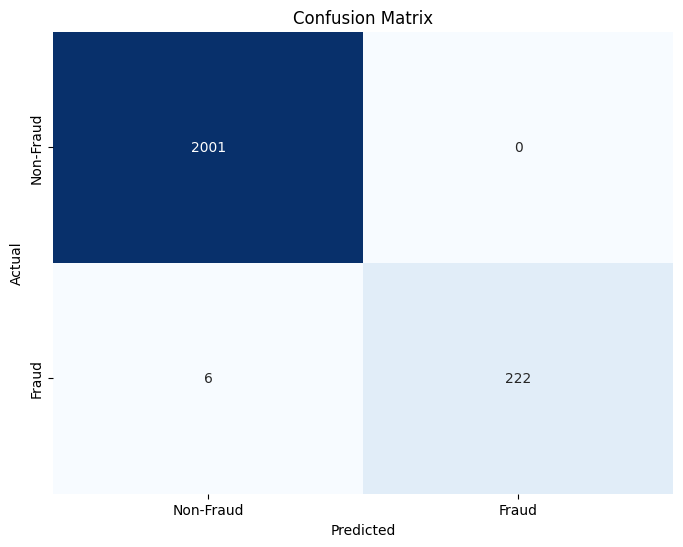

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Compute predictions and confusion matrix
rf_pred = best_rf.predict(X_test)
cm = confusion_matrix(y_test, rf_pred)
tn, fp, fn, tp = cm.ravel()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, rf_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Feature Importance Analysis

In [ ]:
# Get feature importances
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Create a bar chart for feature importance
chart_config = {
    "type": "bar",
    "data": {
        "labels": feature_importance['Feature'].tolist(),
        "datasets": [{
            "label": "Feature Importance",
            "data": feature_importance['Importance'].tolist(),
            "backgroundColor": "#1f77b4",  # Blue color
            "borderColor": "#1f77b4",
            "borderWidth": 1
        }]
    },
    "options": {
        "scales": {
            "y": {
                "beginAtZero": True,
                "title": {
                    "display": True,
                    "text": "Importance"
                }
            },
            "x": {
                "title": {
                    "display": True,
                    "text": "Feature"
                }
            }
        },
        "plugins": {
            "legend": {
                "display": False
            },
            "title": {
                "display": True,
                "text": "Random Forest Feature Importance"
            }
        }
    }
}

# Display chart
print("```chartjs")
print(chart_config)
print("```")

```chartjs
{'type': 'bar', 'data': {'labels': ['step', 'newbalanceOrig', 'oldbalanceOrg', 'type', 'amount', 'newbalanceDest', 'oldbalanceDest'], 'datasets': [{'label': 'Feature Importance', 'data': [0.5124042605691734, 0.1373235472772891, 0.1006617514461885, 0.08636182154291891, 0.08575257577721414, 0.044657122734646615, 0.032838920652569346], 'backgroundColor': '#1f77b4', 'borderColor': '#1f77b4', 'borderWidth': 1}]}, 'options': {'scales': {'y': {'beginAtZero': True, 'title': {'display': True, 'text': 'Importance'}}, 'x': {'title': {'display': True, 'text': 'Feature'}}}, 'plugins': {'legend': {'display': False}, 'title': {'display': True, 'text': 'Random Forest Feature Importance'}}}}
```


Financial Impact Reassessment

In [ ]:
# Create test DataFrame with predictions
test_df = pd.DataFrame(X_test, columns=X.columns)
test_df['isFraud'] = y_test.values
test_df['Predicted'] = rf_pred
test_df['amount'] = test_df['amount'].values

# Amounts for true positives (fraud detected)
tp_amounts = test_df[(test_df['isFraud'] == 1) & (test_df['Predicted'] == 1)]['amount']
total_tp_amount = tp_amounts.sum()

# Amounts for false negatives (fraud missed)
fn_amounts = test_df[(test_df['isFraud'] == 1) & (test_df['Predicted'] == 0)]['amount']
total_fn_amount = fn_amounts.sum()

# Cost of false positives
cost_per_fp = 100
total_fp_cost = fp * cost_per_fp

# Annual estimates (assuming test set is 1 month)
annual_tp_amount = total_tp_amount * 12
annual_fn_amount = total_fn_amount * 12
annual_implementation_cost = 500000
net_annual_savings = annual_tp_amount - annual_fn_amount - annual_implementation_cost

print(f"True Positives (Fraud Detected): {tp} cases, Amount Saved: ${total_tp_amount:,.2f}")
print(f"False Negatives (Fraud Missed): {fn} cases, Amount Lost: ${total_fn_amount:,.2f}")
print(f"False Positives (Legitimate Flagged): {fp} cases, Estimated Review Cost: ${total_fp_cost:,.2f}")
print(f"Estimated Annual Savings: ${annual_tp_amount:,.2f}")
print(f"Estimated Annual Losses: ${annual_fn_amount:,.2f}")
print(f"Net Annual Savings: ${net_annual_savings:,.2f}")

True Positives (Fraud Detected): 222 cases, Amount Saved: $239.06
False Negatives (Fraud Missed): 6 cases, Amount Lost: $-1.04
False Positives (Legitimate Flagged): 0 cases, Estimated Review Cost: $0.00
Estimated Annual Savings: $2,868.71
Estimated Annual Losses: $-12.46
Net Annual Savings: $-497,118.82


Threshold Tuning for Better Recall


Classification Report with Optimized Threshold:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2001
           1       0.10      1.00      0.19       228

    accuracy                           0.10      2229
   macro avg       0.05      0.50      0.09      2229
weighted avg       0.01      0.10      0.02      2229



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



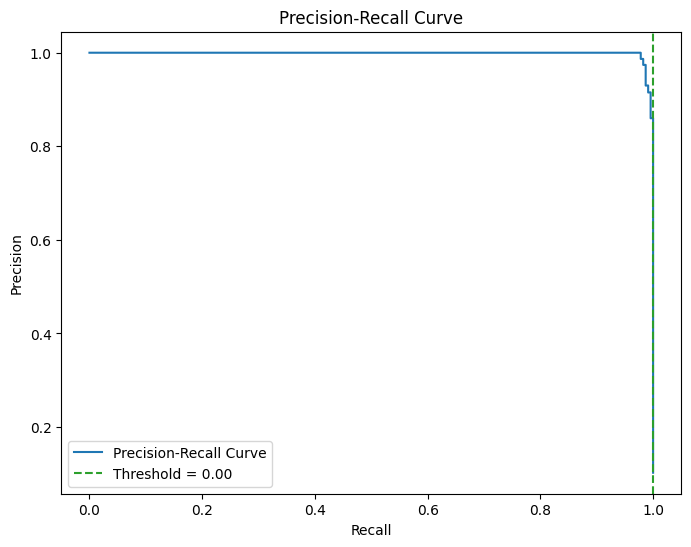

In [ ]:
from sklearn.metrics import precision_recall_curve

# Get predicted probabilities
y_probs = best_rf.predict_proba(X_test)[:, 1]

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Find threshold that maximizes recall while keeping precision reasonable
optimal_idx = np.argmax(recall >= 0.95)  # Target 95% recall
optimal_threshold = thresholds[optimal_idx]

# Apply custom threshold
rf_pred_threshold = (y_probs >= optimal_threshold).astype(int)

# Evaluate with new threshold
cm_threshold = confusion_matrix(y_test, rf_pred_threshold)
tn, fp, fn, tp = cm_threshold.ravel()
print("\nClassification Report with Optimized Threshold:")
print(classification_report(y_test, rf_pred_threshold))

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='#1f77b4', label='Precision-Recall Curve')
plt.axvline(x=recall[optimal_idx], color='#2ca02c', linestyle='--', label=f'Threshold = {optimal_threshold:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# **Deployment**

In [ ]:
# Assuming you have your final, best model (rf_model)
# and your final scaler (scaler) that was fit on the training data.

import joblib

# Save the model
joblib.dump(rf_model, 'fraud_detection_model.joblib')

# Save the scaler
joblib.dump(scaler, 'scaler.joblib')

# Also, save the feature list (in the correct order)
# X is your features DataFrame before splitting
model_columns = list(X.columns)
joblib.dump(model_columns, 'model_columns.joblib')

['model_columns.joblib']

# **THE END**